# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Открытие файла с данными и изучение общий информации

### 1.1 Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

### 1.2 Откытие файла

In [2]:
try:
    data = pd.read_csv('games.csv')
except FileNotFoundError:
    data = pd.read_csv('/datasets/games.csv')
    
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### 1.3 Информация о датасете

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак всего у нас в датасете 16715 столбцов. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропуски. Начнём подготовку данных к анализу.

## Шаг 2. Подготовка данных

### 2.1 Замена названия столбцов (нижний регистр);

In [4]:
# new_columns = []
# for column in data.columns:
#    new_columns.append(column.lower())
# data.columns = new_columns
# data.columns

data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Преобразование данных в нужные типы. 

Для удобства поменяем типы столбцов. Столбец year_of_release сделаем типа int, так как так на много легче будет сравнивать год, можно было поменять в тип datetime, но так как у нас нету ни месяца, ни даты это не имеет смысла

In [5]:
data['year_of_release'] = data['year_of_release'].dropna().astype(int)

Посмотрим на значения в столбце user_score

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

"tbd"... Поискав в интернете, мне удалось найти некоторые расшифровки аббревиатуры "tbd". tbd — это сокращение произошло от выражения «to be determined”. Так же это аббревиатуру можно перевести как To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. Последний вариант скорее всего что на самом деле подходит нам.

Из-за того что мы не можем поменять "tbd" на число 0 до 10. Тогда следует заменить их на пропуски(np.nan), так как это больше всего подходит по смыслу. Затем весь столбец поменяем на тип float для того, чтобы мы могли производить расчёты с этим столбцом.

In [7]:
data = data.replace('tbd', np.nan)
data['user_score'] = data['user_score'].dropna().astype(float)

Интересно почему же в столбце с рейтингами >40% пропусков. Проверим на кикие строки расспространяются пропуски

In [8]:
data[data['user_score'].isna() | data['critic_score'].isna() | data['rating'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Посмотрим в каких годах выпускались игры с пропусками. Возможно это связанно с годом выпуска, когда выходили игры в 90 - х годах не сохраняли рейтинг.

In [9]:
(data[data['user_score'].isna() |
      data['critic_score'].isna() |
      data['rating'].isna()]['year_of_release'].value_counts().sort_values(ascending=False).head(10)
)

2009.0    876
2008.0    835
2010.0    826
2011.0    682
2007.0    607
2006.0    478
2015.0    395
2005.0    377
2002.0    374
1998.0    354
Name: year_of_release, dtype: int64

От года это явно не зависит. Может быть из-за платформы на которой выходила игра.

In [10]:
(data[data['user_score'].isna() |
      data['critic_score'].isna() |
      data['rating'].isna()]['platform'].value_counts().sort_values(ascending=False)
)

DS      1683
PS      1044
PS2     1000
Wii      829
PSP      816
GBA      581
PS3      548
X360     385
3DS      363
N64      319
PSV      311
PC       307
XB       244
SNES     239
GC       200
SAT      173
PS4      153
2600     133
GB        98
NES       98
XOne      88
WiiU      58
DC        38
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Платформы тоже не влияют на рейтинг. Скорее всего рейтинг и оценки не ставят вместе(то есть у строки пропущены сразу 3 параметра одновременно) и по какой-то причине ей вообще не поставили ошибку(человеческий фактор или технический баг). Проверим

In [11]:
all_na = data[data['user_score'].isna() | data['critic_score'].isna() | data['rating'].isna()].shape[0]
not_all_na = data[data['user_score'].isna() & data['critic_score'].isna() & data['rating'].isna()].shape[0]
print(round(not_all_na / all_na * 100, 2), '% От всех пропусков')

68.25 % От всех пропусков


Похоже на правду.

### 2.3 Обработка пропусков

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим строки с пропусками в столбцах name, genre и year_of_release. Мы можем удалить эти строки, так их нельзя заменить на что-либо + их очень мало. Но сначала посмотрим на строки с пропусками в столбце year_of_release.  

In [13]:
data[data['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Нууу похоже мы ничего особо не теряем, удаляя эти строки. Так что удалим их со спокойной душой

In [14]:
data = data.query('not(name.isna())')
data = data.query('not(year_of_release.isna())')
data = data.query('not(genre.isna())')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Проверим наш датасет

In [15]:
data.shape

(16444, 11)

Всё хорошо

### 2.4 Поиск дубликатов

In [16]:
D = dict()
name = list(map(lambda x: x.lower(), sorted(data['name'].unique())))
for i in name:
    D[i] = D.get(i, 0) + 1
for key, value in D.items():
    if value > 1:
        print(key)

Явных дубликатов не обнаружено

Поиск неявных дубликатов

In [17]:
data[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Всего 3 столбца и у них маленькие продажи. Можем удалять

In [18]:
data = data[data.duplicated(subset=['name', 'platform']) == False]

### 2.5 Добавление столбца "суммарные продажи во всех регионах" 

In [19]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Подводя итог этого шага. В этом шаге мы почистили данные от дубликатов и от пропусков. Так же мы разобрались с tbd, решив заменять их на np.nan, так как по смылу это строки с играми, для которых оценка не проставлена, пропущена по каким-то причинамю Для удобства мы создали столбец world_sales для дальнейшей работы. Приступим к исследованиям.

## 3 Шаг. Проведение исследовательского анализа данных

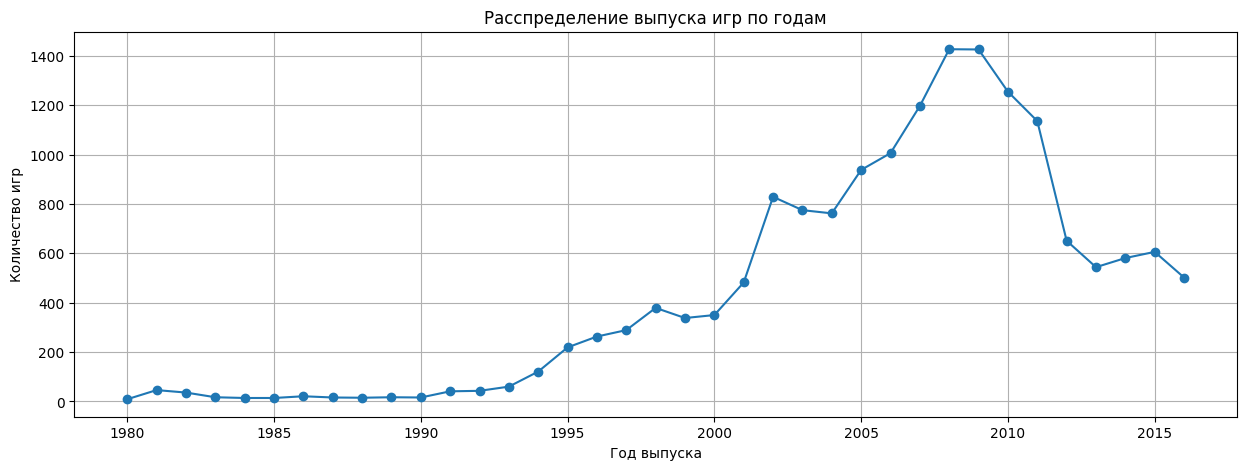

In [20]:
(data.groupby('year_of_release')['name'].count()
     .plot(grid=True,
           xlabel='Год выпуска',
           ylabel='Количество игр',
           figsize=(15, 5),
           style='-o',
           title='Расспределение выпуска игр по годам'
          )
);

Как мы видим, исходя из графика, до 1990 года делали очень мало игр, что неудивительно, так как в то время индустрия только начала развиваться. Пик количесвта созданных игр приходится на 2008 - 2009 год. Для дальнейшего анализа нам потребуются данные начиная с 1993, так как в то время начался рост выпуска игр. Сделаем отдельную переменную с данными с 1993 - 2016 год

In [21]:
#years = list(range(1993, 2017))
years = list(range(2014, 2017))
current_period = data.query('year_of_release in @years')
current_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  world_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


In [22]:
top_sales = (current_period.pivot_table(values='world_sales',
                            index=['platform'],
                            aggfunc='sum')
               .sort_values('world_sales', ascending=False)
               .reset_index()
)

top_sales.head(10)

,platform,world_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Возьмём первые 10 платформ с наибольшими суммарными продажами и построим распределение по годам.

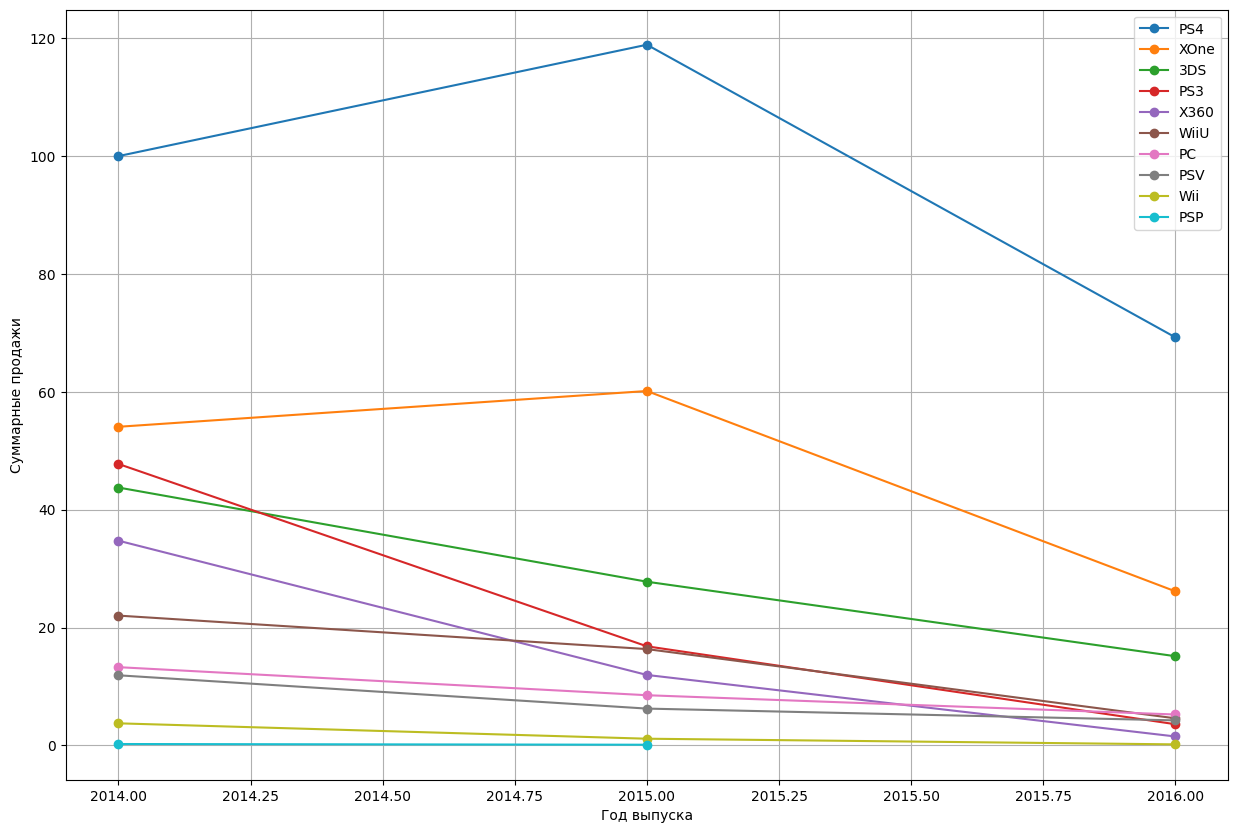

In [23]:
a = list(top_sales['platform'][:10])
for i in top_sales['platform'][:10]:
    (current_period.query('platform == @i')
                   .groupby('year_of_release')['world_sales'].sum()
                   .plot(x='year_of_release',
                         y='world_sales',
                         grid=True,
                         xlabel='Год выпуска',
                         ylabel='Суммарные продажи',
                         figsize=(15, 10),
                         style='-o',
                        )
    )
    plt.legend(a)


По этому %старому% графику видно, что в среднем среди топ 10 по заработкам платформ, платформы 4-5 лет увеличивают свою прибль, а после она идёт на спад. Также из графика можно увидеть, что платформы живут в среднем около 10 лет, после чего покидают рынок.

Теперь найдём потенциально прибыльные платформы. Для их поиска возьмём платформы которые появились в 2014 - 2015 и их прибыль растёт

In [24]:
#top_sales_nowadays = (current_period.query('year_of_release >= 2014')
#                                    .pivot_table(values='world_sales',
#                                                 index=['platform'],
#                                                 aggfunc='sum')
#                                    .sort_values('world_sales', ascending=False)
#                                    .reset_index()
#)
#
#top_sales_nowadays.shape

In [25]:
#a = list(top_sales_nowadays['platform'])
#for i in top_sales_nowadays['platform']:
#    (current_period.query('platform == @i')
#                   .groupby('year_of_release')['world_sales'].sum()
#                   .plot(x='year_of_release',
#                         y='world_sales',
#                         grid=True,
#                         xlabel='Год выпуска',
#                         ylabel='Суммарные продажи',
#                         figsize=(15, 10),
#                         style='-o',
#                        )
#    )
#    plt.legend(a)
#    plt.axis([2012, 2017,0, 120])

Получается лишнее

Выбор не велик... По 2016 не стоит делать выводы, так как мы не знаем в какой момент закончили делать записи. 

У XOne и PS4 явно растут продажи, у всех остальных продажи падают. XOne и PS4 потенциально прибыльные платформы, так как они создались не так давно(всего 3 года назад) + их прибыль растёт.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

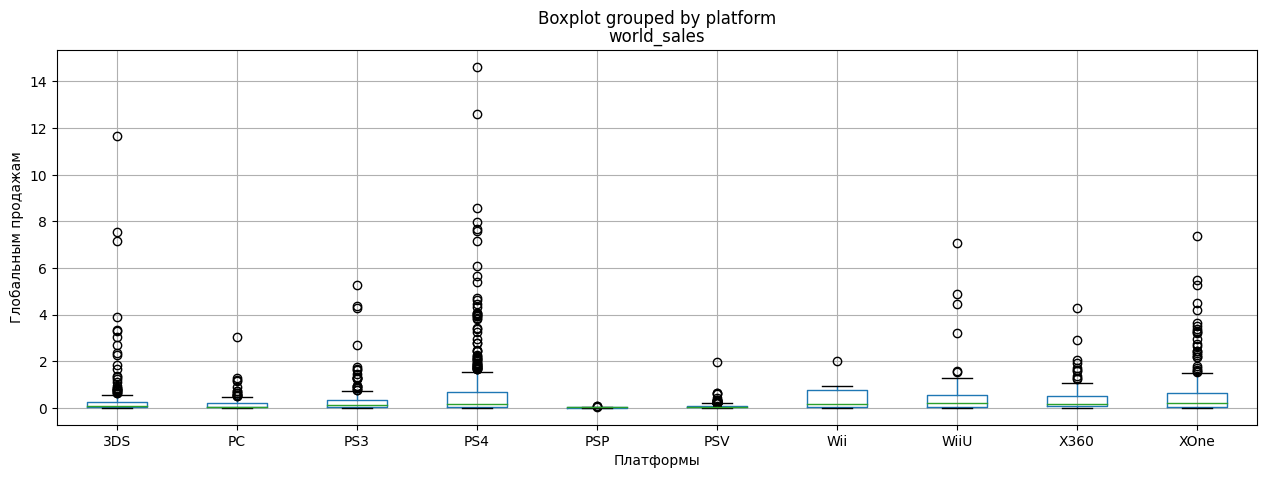

In [26]:
current_period.boxplot(column='world_sales',
                       by='platform',
                       figsize=(15,5),
                       xlabel='Платформы',
                       ylabel='Глобальным продажам');

Из-за одного выброса сложно анализировать данный график. Развернём его.

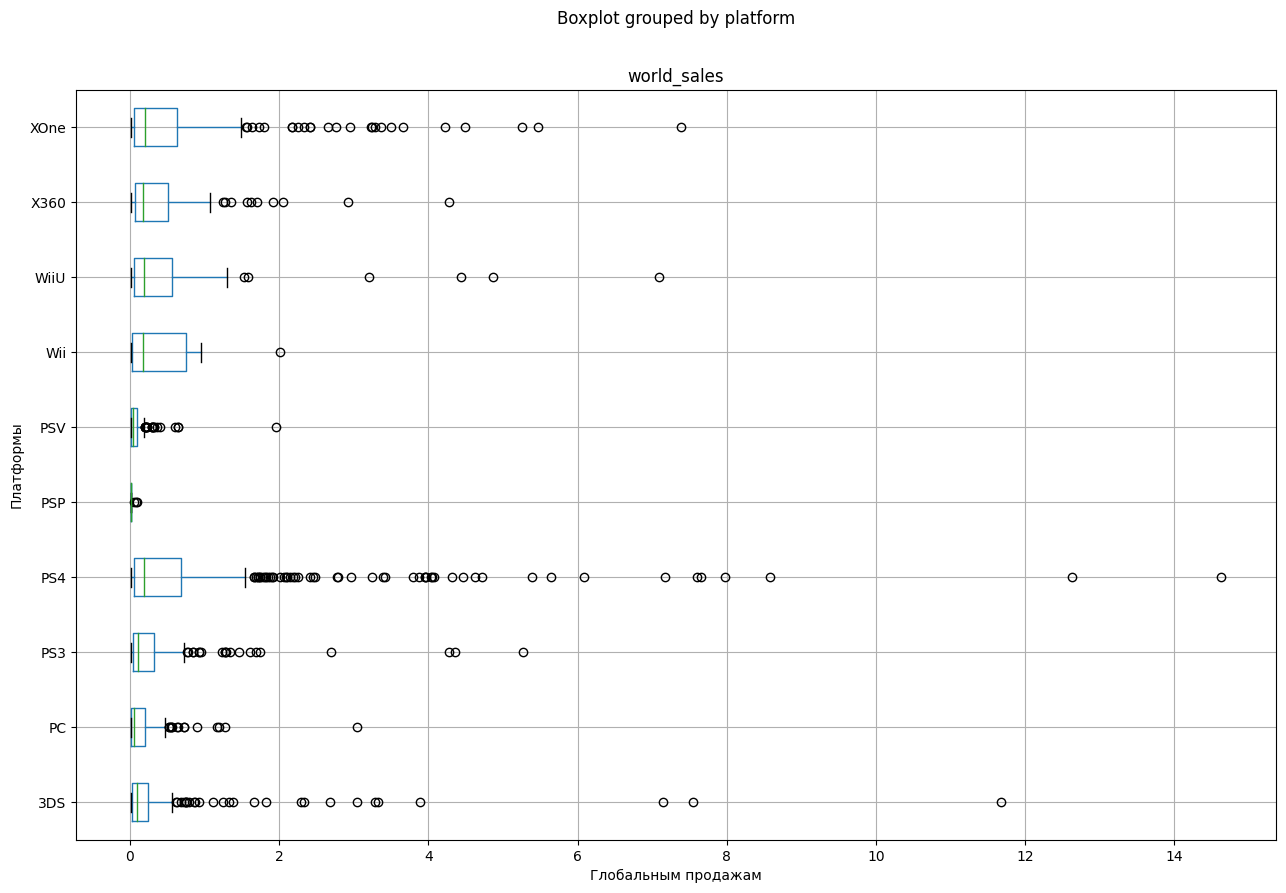

In [28]:
current_period.boxplot(column='world_sales',
                       by='platform',
                       figsize=(15,10),
                       ylabel='Платформы',
                       xlabel='Глобальным продажам',
                       vert=False);

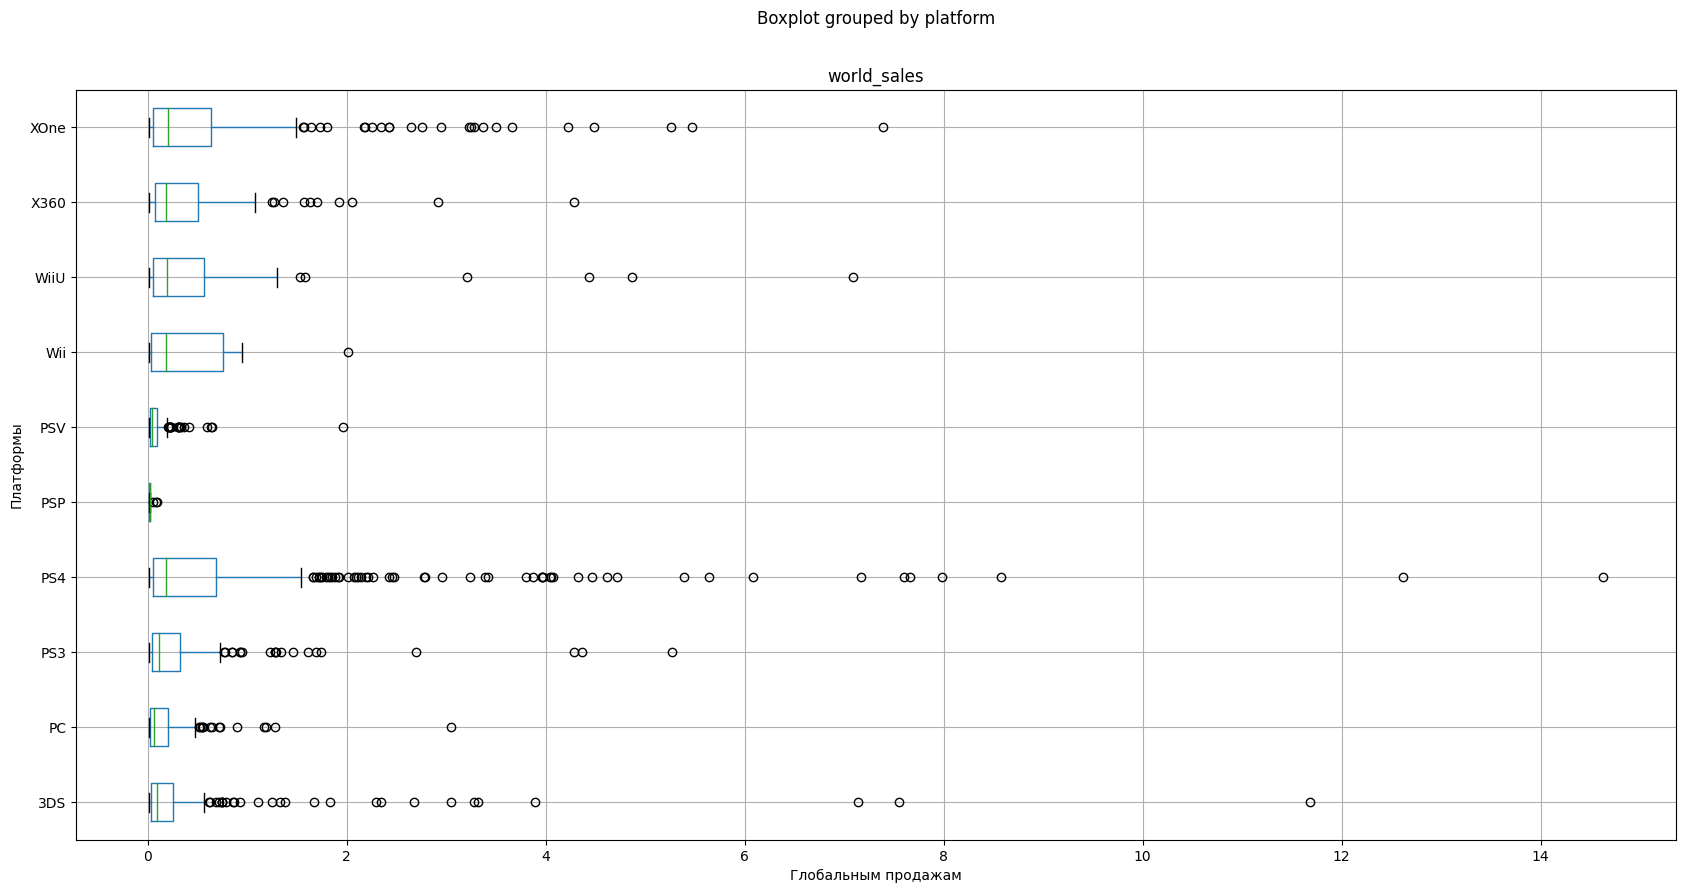

In [30]:
current_period.boxplot(column='world_sales',
                       by='platform',
                       figsize=(20,10),
                       ylabel='Платформы',
                       xlabel='Глобальным продажам',
                       vert=False);

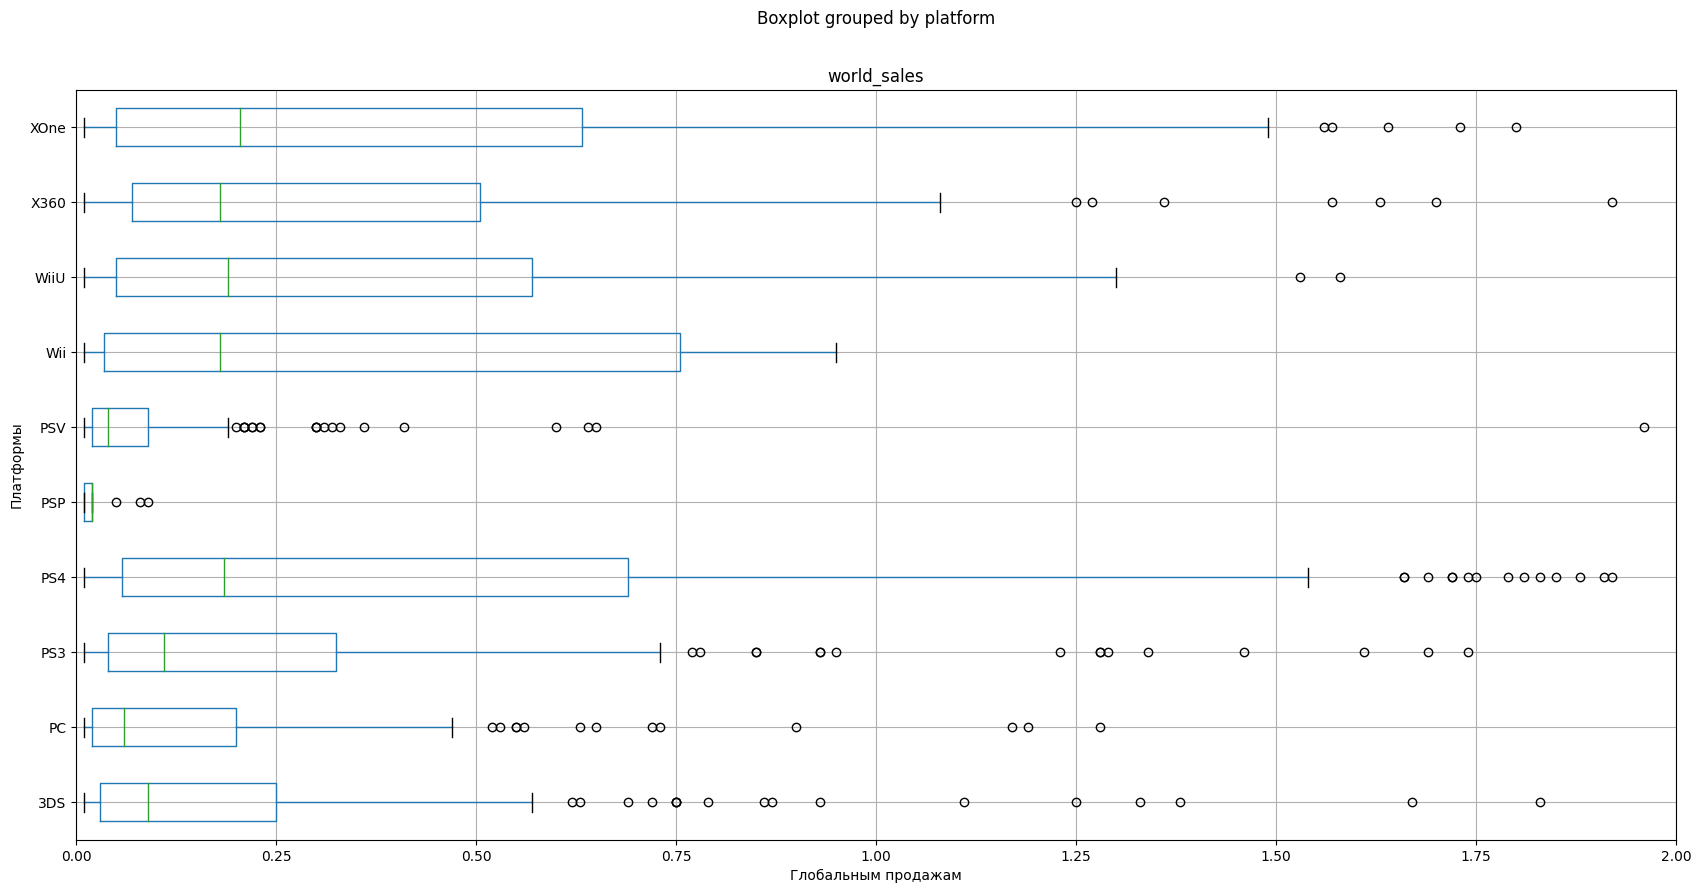

In [31]:
current_period.boxplot(column='world_sales',
                       by='platform',
                       figsize=(20,10),
                       ylabel='Платформы',
                       xlabel='Глобальным продажам',
                       vert=False)
plt.xlim(0, 2);

Судя по этому графику, можно сделать вывод, что у большинства платформ есть игры, которые очень зашли аудитории, но при этом большенство игр продаются относительно мало. %Так же стоит обратить внимание на платформу Wii у неё 7 проектов продали больше 20 млн копий.%


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Возьмем приставку PS4.

              critic_score  world_sales
critic_score      1.000000     0.402661
world_sales       0.402661     1.000000


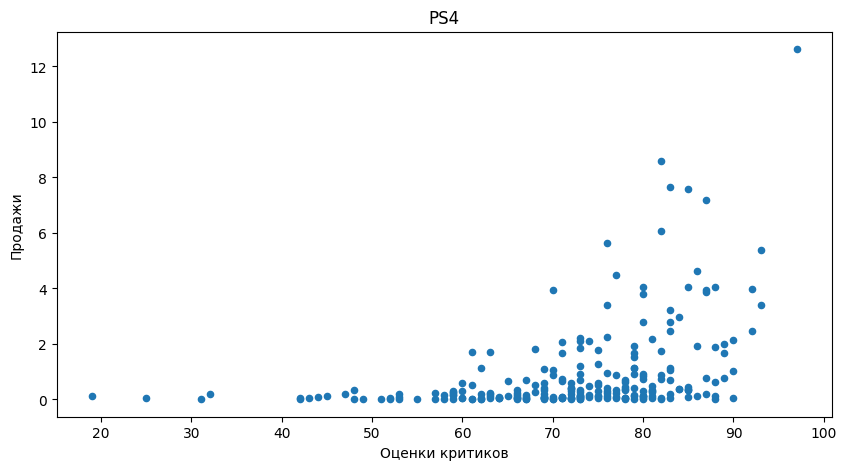

In [32]:
(current_period.query('platform == "PS4"')
               .plot(kind='scatter',
                     x='critic_score',
                     y='world_sales',
                     xlabel='Оценки критиков',
                     ylabel='Продажи',
                     figsize=(10,5),
                     title='PS4')
);
print(current_period.query('platform == "PS4"')[['critic_score', 'world_sales']].corr())

И так мы видим, что в случае с PS4 зависимость продаж от оценки критиков присутствует хоть и не так ярко выраженно. График это доказывает.

             user_score  world_sales
user_score     1.000000    -0.040132
world_sales   -0.040132     1.000000


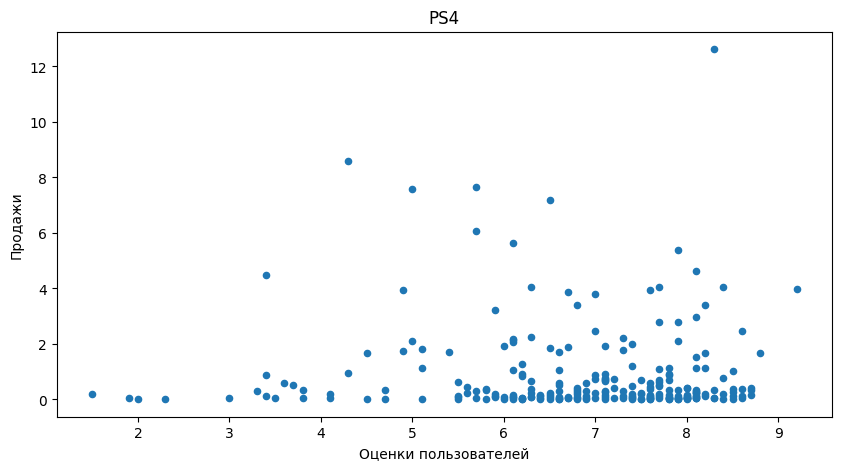

In [33]:
(current_period.query('platform == "PS4"')
               .plot(kind='scatter',
                     x='user_score',
                     y='world_sales',
                     xlabel='Оценки пользователей',
                     ylabel='Продажи',
                     figsize=(10,5),
                     title='PS4')
);
print(current_period.query('platform == "PS4"')[['user_score', 'world_sales']].corr())

А вот с оценками пользователей скоре можно сказать, что зависимость не обнаружена.

Проверим ещё на одной платформе

              critic_score  world_sales
critic_score      1.000000     0.428677
world_sales       0.428677     1.000000


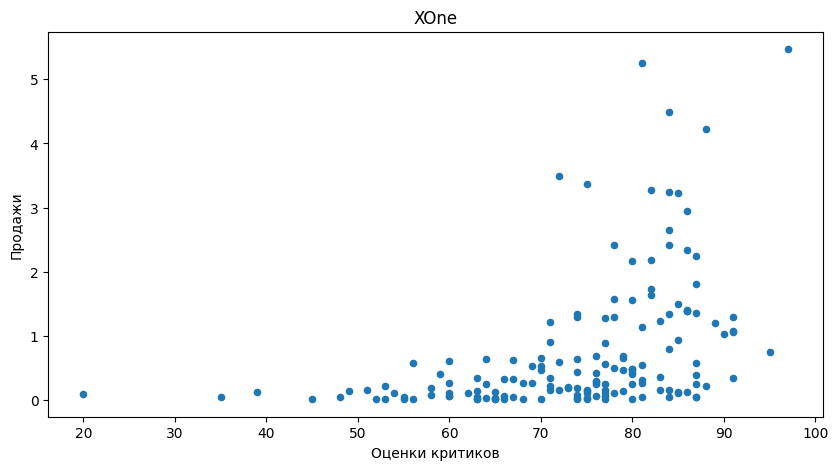

In [34]:
(current_period.query('platform == "XOne"')
               .plot(kind='scatter',
                     x='critic_score',
                     y='world_sales',
                     xlabel='Оценки критиков',
                     ylabel='Продажи',
                     figsize=(10,5),
                     title='XOne')
);
print(current_period.query('platform == "XOne"')[['critic_score', 'world_sales']].corr())

             user_score  world_sales
user_score     1.000000    -0.138445
world_sales   -0.138445     1.000000


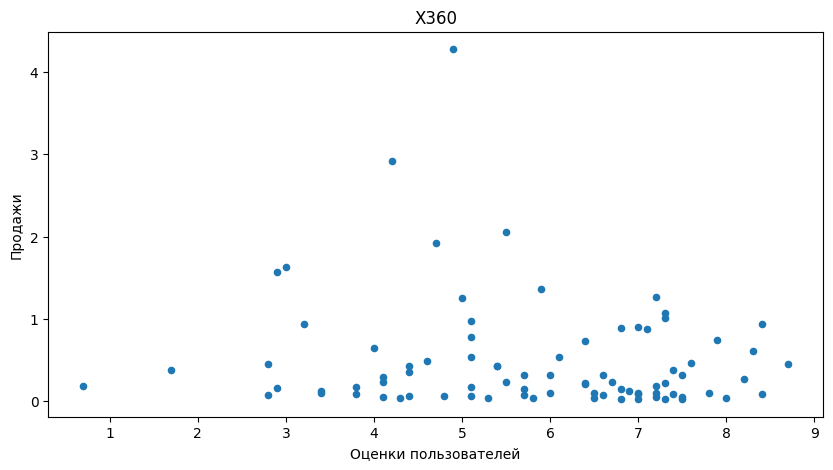

In [35]:
(current_period.query('platform == "X360"')
               .plot(kind='scatter',
                     x='user_score',
                     y='world_sales',
                     xlabel='Оценки пользователей',
                     ylabel='Продажи',
                     figsize=(10,5),
                     title='X360')
);
print(current_period.query('platform == "X360"')[['user_score', 'world_sales']].corr())

Дополнительные 2 графика показали что связь +/- такая же как и с PS4.

Посмотрим на общее распределение игр по жанрам. 

In [36]:
pt_genre = current_period.pivot_table(values='world_sales', index='genre', aggfunc=['median', 'count'])
pt_genre.columns = ['median', 'count']
pt_genre.sort_values('median', ascending=False)


,median,count
genre,,
Shooter,0.515,128
Sports,0.180,161
Platform,0.140,38
Fighting,0.125,60
Role-Playing,0.110,221
Simulation,0.100,44
Action,0.090,619
Misc,0.090,113
Racing,0.090,69


Из всех жанров явно выделяется жанр "Shooter", также неплохие продажи показали жанры "Sports", "Platform". А вот "Adventure", "Puzzle" и "Strategy" явно не пользуются популярностью.

## Шаг 4.  Составление портрета пользователя каждого региона

### 4.1 NA

In [37]:
s_na = current_period['na_sales'].sum()
current_period.loc[:, 'share_of_na'] = current_period['na_sales'] / s_na * 100

(current_period.pivot_table(values='share_of_na', index='platform', aggfunc='sum')
               .sort_values('share_of_na', ascending=False)
               .head(5)
)

C:\Users\Админ\AppData\Local\Temp\ipykernel_15944\1017843610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_period.loc[:, 'share_of_na'] = current_period['na_sales'] / s_na * 100


,share_of_na
platform,
PS4,34.714497
XOne,28.610153
X360,9.962684
3DS,7.970147
PS3,7.762445


Топ 5 платформ в Северной америки и их доля продаж.

In [38]:
(current_period.pivot_table(values='na_sales', index='genre', aggfunc='median')
               .sort_values('na_sales', ascending=False)
)

,na_sales
genre,
Shooter,0.220
Platform,0.075
Sports,0.070
Fighting,0.040
Racing,0.030
Role-Playing,0.020
Action,0.010
Misc,0.010
Adventure,0.000


В Северной Америке явно любят жанры платформеры, спорт и шутеры. А вот приключения, пазлы и стратегии явно не популярны.

In [39]:
p_table = current_period.pivot_table(index='rating', values='na_sales', aggfunc='median', dropna=False)

# p_table.columns = ['sum', 'count']
p_table.sort_values('na_sales', ascending=False)

,na_sales
rating,
M,0.12
E10+,0.10
E,0.05
T,0.03


In [40]:
print(current_period.query('rating.isna()')['na_sales'].count())
current_period.query('rating.isna()')['na_sales'].median()

749


0.0

Для начала выпишем расшифровки рейтинга из википедии.

* «E» («Everyone») — «Для всех»

* «T» («Teen») — «Подросткам»

* «M» («Mature») — «Для взрослых»

* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

* "K-A" ("Kids to Adults") - тоже самое что и «E»

* «AO» («Adults Only 18+») — «Только для взрослых»

* «EC» («Early childhood») — «Для детей младшего возраста»

* «RP» («Rating Pending») — «Рейтинг ожидается»

И так у нас явно выделяются 4 обозначения E, T, M, E10+. В NA лучше всех показывают себя игры для взрослых

### 4.2 EU

In [41]:
s_na = current_period['eu_sales'].sum()
current_period.loc[:, 'share_of_eu'] = current_period['eu_sales'] / s_na * 100

(current_period.pivot_table(values='share_of_eu', index='platform', aggfunc='sum')
               .sort_values('share_of_eu', ascending=False)
               .head(5)
)

C:\Users\Админ\AppData\Local\Temp\ipykernel_15944\2668229868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_period.loc[:, 'share_of_eu'] = current_period['eu_sales'] / s_na * 100


,share_of_eu
platform,
PS4,48.041968
XOne,17.086597
PS3,9.435496
PC,6.638836
3DS,5.955372


Топ 5 платформ в Европе и их доля продаж.

In [42]:
(current_period.pivot_table(values='eu_sales', index='genre', aggfunc='median')
               .sort_values('eu_sales', ascending=False)
)

,eu_sales
genre,
Shooter,0.220
Platform,0.055
Racing,0.050
Sports,0.050
Simulation,0.030
Action,0.020
Fighting,0.020
Misc,0.010
Role-Playing,0.010


В Европе сильнее всех жанров выделяются шутеры.

In [43]:
p_table = current_period.pivot_table(index='rating', values='eu_sales', aggfunc='median', dropna=False)

# p_table.columns = ['sum', 'count']
p_table.sort_values('eu_sales', ascending=False)

,eu_sales
rating,
M,0.12
E10+,0.09
E,0.05
T,0.04


In [44]:
current_period.query('rating.isna()')['eu_sales'].median()

0.0

В Европе выделяются 4 обозначения E, T, M, E10+. В EU также предпочитают игры для взрослых.

### 4.3 JP

In [45]:
s_na = current_period['jp_sales'].sum()
current_period.loc[:, 'share_of_jp'] = current_period['jp_sales'] / s_na * 100

(current_period.pivot_table(values='share_of_jp', index='platform', aggfunc='sum')
               .sort_values('share_of_jp', ascending=False)
               .head(5)
)

C:\Users\Админ\AppData\Local\Temp\ipykernel_15944\199922578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_period.loc[:, 'share_of_jp'] = current_period['jp_sales'] / s_na * 100


,share_of_jp
platform,
3DS,47.523902
PS4,16.134923
PSV,15.619293
PS3,12.052852
WiiU,7.852616


Топ 5 платформ в Европе и их доля продаж.

In [46]:
(current_period.pivot_table(values='jp_sales', index='genre', aggfunc='median')
               .sort_values('jp_sales', ascending=False)
)

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Puzzle,0.03
Action,0.01
Adventure,0.01
Misc,0.01
Platform,0.00
Racing,0.00
Shooter,0.00


В Японии очень любят ролевые игры, а дальше файтинги, пазлы.

In [47]:
p_table = pd.pivot_table(current_period,
                         index='rating',
                         values='jp_sales',
                         aggfunc='median')

p_table.sort_values('jp_sales', ascending=False)

,jp_sales
rating,
T,0.01
E,0.00
E10+,0.00
M,0.00


In [48]:
current_period.query('rating.isna()')['jp_sales'].median()

0.02

Yа удивление игры без рейтинга лидируют. Скорее всего это объясняется тем, что японцы больше ориентируются на свою рейтинговую модель CERO, а у дальневосточных стран более жёсткая, поэтому зачастую разроботчики выпускают специальные версии игр для этоги региона.

__Сравнение NA - EU - JP__

1) В Европе и Америке по популярности с большим отрывом лидирует консоль PS4, а в Японии 3DS

2) В Европе и Америке очень любят шутеры и платформеры, в то время как в Японии ролевые игры и файтинги

3) В Европе и Америке больше всего продаж игр для взрослых, в Японии игр без рейтинга

Итог: Европа и Америка во многом похожи, а у Японии свои вкусы

## Шаг 5. Проверка гипотиз

Гипотеза №1:

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Для проверки гипотезы возьмем данные с 2013 года, потому что Xbox One вышел в 2013 году.

In [49]:
sample_1 = current_period.query('platform == "XOne" and year_of_release >= 2013')['user_score']
sample_2 = current_period.query('platform == "PC" and year_of_release >= 2013')['user_score']
print(sample_1.shape)
print(sample_2.shape)

results = st.ttest_ind(sample_1, sample_2, equal_var = True, nan_policy='omit')
alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нолевую гипотезу")

(228,)
(151,)
p-значение:  0.10450507919348513
Не получилось отвергнуть нолевую гипотезу


Гипотеза №2:

Нулевая гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [50]:
sample_1 = current_period.query('genre == "Action"')['user_score']
sample_2 = current_period.query('genre == "Sports"')['user_score']
print(sample_1.shape)
print(sample_2.shape)

results = st.ttest_ind(sample_1, sample_2, equal_var=False, nan_policy='omit')
alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нолевую гипотезу")

(619,)
(161,)
p-значение:  1.182555038264477e-14
Отвергаем нулевую гипотезу


## Шаг 6. Выводы

До 1990 года делали очень мало игр, что неудивительно, так как в то время индустрия только начала развиваться. Пик количесвта созданных игр приходится на 2008 - 2009 год.

Нам интересен промежуток с 2014 - 2016 года

ТОП 5 платформ по продажам

* PS4

* XOne

* 3DS

* PS3

* X360

В среднем среди топ 10 по заработкам платформ, платформы 4-5 лет увеличивают свою прибль, а после она идёт на спад. Также можно увидеть, что платформы живут в среднем около 10 лет, после чего покидают рынок.

У XOne и PS4 явно растут продажи, у всех остальных продажи падают. _XOne_ и _PS4_ потенциально прибыльные платформы, так как они создались не так давно(всего 3 года назад) + их прибыль растёт.

У большинства платформ есть игры, которые очень зашли аудитории, но при этом большенство игр продаются относительно мало.

Из всех жанров явно выделяется жанр "Shooter", также неплохие продажи показали жанры "Platform" в Европе и Америке. "Role-Playing" в Японии

__Портрет пользователя каждого региона__

__NA__

1) Топ 5 платформ в Северной америки и их доля продаж.

<code>Platform      | share_of_na
    :-------- |:-----:
    PS4      | 34.71 % 
    XOne       | 28.61 %  
    X360       | 9.96 %
    3DS       | 7.97 %
    PS3        | 7.76 %
</code>

2) В Северной Америке явно любят жанры шутер, платформеры и спорт.

3) В Северной Америке предпочитают игры для взрослых(рейтинг M).

__EU__

1) Топ 5 платформ в Европе и их доля продаж.

<code>Platform      | share_of_na
    :-------- |:-----:
    PS4      | 48.04 % 
    XOne       | 17.08 %  
    PS3       | 9.43 %
    PC       | 6.63 %
    3DS        | 5.95 %
</code>

2) В Европе почти всё так же, как и в Северной Америке, только продаж тут меньше.

3) В Европе предпочитают игры для взрослых(рейтинг M).

__JP__

1) Топ 5 платформ в Японии и их доля продаж.


<code>Platform      | share_of_na
    :-------- |:-----:
    3DS      | 47.52 % 
    PS4       | 16.13 %  
    PSV      | 15.6 %
    PS3       | 12.05 %
    WiiU        | 7.85 %
</code>

2) В Японии очень любят ролевые игры, а дальше файтинги, пазлы.

3) В Японии предпочитают игры без рейтинга(у них свой).

__Гипотезы__:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. __Отвергнуть не получилось__

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. __Отвергаем гипотезу__


__Предлагаемые ходы для получения прибыли__

__Основная идея__:

Я предлагая провести рекламную компанию игры для взрослых(рейтинг M) в жанре "Shooter" или "Platform" в Европе или Северной Америке(лучше в америке) на платформе PS4.

__Альтернатива__:

Можно также разрекламировать игру для взрослых(рейтинг M) в жанре "Shooter" или "Platform" в Европе или Северной Америке(лучше в америке) на платформе XOne.

__Альтернатива №2 (если мы хотим покорить японский рынок)__:

Проведём рекламную компанию игры в жанре "Role-Playing" или "Fighting" в Японии на платформе 3DS.